# Scheurvorming bij dijken

In deze Jupyter Notebook kijken we naar de beschikbare data omtrent scheurvorming bij dijken en of daar statistische verbanden te vinden zijn.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/Droogte onderzoek.csv', sep='|')

Eerst maar eens kijken wat we voor data hebben.

In [3]:
df.head(5)

,Dijkcode en naam,Periode ophogen,Omschrijving bijzondere zaken,van,tot,Lengte,"dijkdeel K, BT of B",bovgr terug of zw gr erop,mate scheuren wk 32/18,grasmat kwaliteit wk32/18,mate scheuren 2e ronde wk 43/18,grasmat kwaliteit 2e ronde wk 43/18,Opmerking,dr stog tov tot gew,vocht tov tot gewicht,Vocht tov dr stof,diepte tov mv,ref monster,metrering monster
0,A2014 Hogendijk west (echte onversterkte veend...,Feb – mrt18 m200-3125,Ingezaaid apr – mei 18,300.0,350.0,50,kruin,nee,geen,matig gras,nvt,nvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A2014 Hogendijk west (echte onversterkte veend...,Feb – mrt18 m200-3125,Ingezaaid apr – mei 18,300.0,350.0,50,binnentalud,nee,geen,Slecht gras,nvt,nvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2014 Hogendijk west (echte onversterkte veend...,Feb – mrt18 m200-3125,Ingezaaid apr – mei 18,300.0,350.0,50,Berm,nee,geen,matig gras,nvt,nvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A2014 Hogendijk west (echte onversterkte veend...,Feb – mrt18 m200-3125,Ingezaaid apr – mei 18,350.0,400.0,50,kruin,nee,geen,matig gras,nvt,nvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A2014 Hogendijk west (echte onversterkte veend...,Feb – mrt18 m200-3125,Ingezaaid apr – mei 18,350.0,400.0,50,binnentalud,nee,geen,Slecht gras,nvt,nvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Er lijken nogal wat NaN aanwezig te zijn (geen data), we kijken naar het percentage NaNs per kolom

In [4]:
df.isna().sum() / df.shape[0] * 100

Dijkcode en naam                        2.158273
Periode ophogen                         8.273381
Omschrijving bijzondere zaken           5.395683
van                                     2.158273
tot                                     2.158273
Lengte                                  0.719424
dijkdeel K, BT of B                     1.079137
bovgr terug of zw gr erop               2.158273
mate scheuren wk 32/18                  2.158273
grasmat kwaliteit wk32/18               2.158273
mate scheuren 2e ronde wk 43/18         2.158273
grasmat kwaliteit 2e ronde wk 43/18     2.158273
Opmerking                              58.273381
dr stog tov tot gew                    92.446043
vocht tov tot gewicht                  92.805755
Vocht tov dr stof                      92.805755
diepte tov mv                          92.805755
ref monster                            92.805755
metrering monster                      92.805755
dtype: float64

We kunnen constateren dat we met de laatste 7 kolommen wat de algehele waarnemingen betreft niet zoveel kunnen aangezien er meer dan 58 en soms 92% van de data mist. Later kunnen we hier nog specifiek naar kijken maar voor nu halen we die kolommen even weg.

In [5]:
df.drop(df.columns[df.shape[1]-7:df.shape[1]].values, axis=1, inplace=True)

We hebben ook nog wat data die niet direct bijdraagt aan een statistische benadering (bv locatie, van, tot, lengte), die zetten we ook even opzij voor nu. Ook teksten van de omschrijvingen zijn niet direct te gebruiken. Om dit alsnog te gebruiken zouden we de teksten moeten analyseren en kijken of we daar specifieke categorien of datums van kunnen maken. Voor nu gooien we die kolommen weg.

In [6]:
df.drop(['van','tot','Lengte','Omschrijving bijzondere zaken','Dijkcode en naam','Periode ophogen'], axis=1, inplace=True)

Eens kijken wat we nu overhouden

In [7]:
df.head(5)

,"dijkdeel K, BT of B",bovgr terug of zw gr erop,mate scheuren wk 32/18,grasmat kwaliteit wk32/18,mate scheuren 2e ronde wk 43/18,grasmat kwaliteit 2e ronde wk 43/18
0,kruin,nee,geen,matig gras,nvt,nvt
1,binnentalud,nee,geen,Slecht gras,nvt,nvt
2,Berm,nee,geen,matig gras,nvt,nvt
3,kruin,nee,geen,matig gras,nvt,nvt
4,binnentalud,nee,geen,Slecht gras,nvt,nvt


De mate van scheuren is wat ons resultaat moet zijn. De rest van de overgebleven waarnemingen zijn onze directe input. We zien hier 2 resultaten, de scheuren op 32/18 en 43/18. We gaan eerst eens kijken of dijkdeel en bovengrond terug statisch herleidbaar zijn naar het resultaat van de mate van scheuren.

Eerst zorgen we ervoor dat we de resultaten van 32/18 en 43/18 tot een datum onafhankelijke verzameling wordt. Voor een makkelijkere verwerking hernoemen we de kolommen.

In [8]:
df.columns = ['dijkdeel','bovengrond','mate32','gras32','mate43','gras43']

Dat is makkelijker.. nu gaan we de resultaten van 32 en 43 bij elkaar voegen (en checken of dat werkt!)

In [9]:
df32 = df[['dijkdeel','bovengrond','mate32','gras32']]
df43 = df[['dijkdeel','bovengrond','mate43','gras43']]
df32.columns=['dijkdeel','bovengrond','mate','gras']
df43.columns=['dijkdeel','bovengrond','mate','gras']
print("Aantal rijen in df32", df32.shape[0])
print("Aantal rijen in df43", df43.shape[0])
df = df32.append(df43)
print("Resulterend aantal rijen in uiteindelijke dataframe", df.shape[0])
print(df.head(5))

Aantal rijen in df32 278
Aantal rijen in df43 278
Resulterend aantal rijen in uiteindelijke dataframe 556
      dijkdeel bovengrond  mate         gras
0        kruin        nee  geen  matig  gras
1  binnentalud        nee  geen  Slecht gras
2         Berm        nee  geen  matig  gras
3        kruin        nee  geen  matig  gras
4  binnentalud        nee  geen  Slecht gras


Dat ziet er goed uit. Nu moeten we kijken of in alle kolommen gebruik is gemaakt van consequente benaming.

In [10]:
for column in df.columns:
    print("Unieke waarden voor kolom", column)
    print(df[column].unique())

Unieke waarden voor kolom dijkdeel
['kruin' 'binnentalud' 'Berm' nan 'berm' 'goed' 'matig' 'slecht'
 'uitstekend']
Unieke waarden voor kolom bovengrond
['nee' 'ja' 'nvt' nan]
Unieke waarden voor kolom mate
['geen' 'weinig' 'matig' 'nvt' 'veel' nan]
Unieke waarden voor kolom gras
['matig  gras' 'Slecht gras' 'goed gras' 'uitstekend gras' 'nvt' nan]


* We zien Berm en berm voor dijkdeel, dat moeten we oplossen
* Kolom bovengrond is ok
* Kolom mate is ok al kun je nvt als NaN beschouwen
* Kolom gras is ok al kun je nvt als NaN beschouwen

Kortom, we moeten twee zaken doen, Berm en berm samenvoegen en de NaN en nvt rijen weghalen en kijken wat we overhouden. De eerste actie doen we door alles lowercase te maken.. leest ook makkelijker.

In [11]:
for column in df.columns:
    df[column] = df[column].str.lower()
df.head()

,dijkdeel,bovengrond,mate,gras
0,kruin,nee,geen,matig gras
1,binnentalud,nee,geen,slecht gras
2,berm,nee,geen,matig gras
3,kruin,nee,geen,matig gras
4,binnentalud,nee,geen,slecht gras


Nu de NaNs en nvt rijen verwijderen.

In [12]:
print("Voor het verwijderen van NaN hebben we {} rijen".format(df.shape[0]))
df.dropna(inplace=True)
print("Na het verwijderen van NaN hebben we {} rijen".format(df.shape[0]))

Voor het verwijderen van NaN hebben we 556 rijen
Na het verwijderen van NaN hebben we 542 rijen


In [13]:
print("Voor het verwijderen van nvt hebben we {} rijen".format(df.shape[0]))
for column in df.columns:
    df = df[df[column]!='nvt']
print("Na het verwijderen van nvt hebben we {} rijen".format(df.shape[0]))

Voor het verwijderen van nvt hebben we 542 rijen
Na het verwijderen van nvt hebben we 365 rijen


Check of we nu enkel nog zinvolle rijen over hebben.

In [14]:
for column in df.columns:
    print("Unieke waarden voor kolom", column)
    print(df[column].unique())

Unieke waarden voor kolom dijkdeel
['kruin' 'binnentalud' 'berm']
Unieke waarden voor kolom bovengrond
['nee' 'ja']
Unieke waarden voor kolom mate
['geen' 'weinig' 'matig' 'veel']
Unieke waarden voor kolom gras
['matig  gras' 'slecht gras' 'goed gras' 'uitstekend gras']


In [15]:
df.head()

,dijkdeel,bovengrond,mate,gras
0,kruin,nee,geen,matig gras
1,binnentalud,nee,geen,slecht gras
2,berm,nee,geen,matig gras
3,kruin,nee,geen,matig gras
4,binnentalud,nee,geen,slecht gras


Laten we eens kijken naar de verdeling van het dijkdeel en de gevonden graskwaliteit. Hiertoe moeten we wel even numerieke waarden aan de kwaliteit toevoegen waarbij we slecht gras = 0 en uitstekend gras = 3 aanhouden. We vinden 
trouwens ook dat er slecht gras en slecht  gras bestaat (2 spaties), dat corrigeren we hierbij.

In [16]:
df2 = df.copy()
df2['gras'] = df2['gras'].replace(['slecht  gras'], 0)
df2['gras'] = df2['gras'].replace(['slecht gras'], 0)
df2['gras'] = df2['gras'].replace(['matig  gras'], 1)
df2['gras'] = df2['gras'].replace(['goed gras'], 2)
df2['gras'] = df2['gras'].replace(['uitstekend gras'], 3)

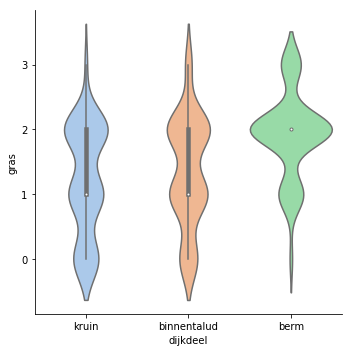

In [20]:
_ = sns.catplot(x='dijkdeel',y='gras', kind="violin", palette="pastel", data=df2)

Je leest de plot als volgt; een dik deel van de violin plot is een plek waar veel waarnemingen zijn gevonden, als de voilin plot dunner wordt dan zijn van die klasse minder waarnemingen gevonden. De dikke plot bij de berm rond waarde 2 betekent dus dat er veel waarnemingen van goed gras zijn bij de berm.

**Een conclusie is dat de kwaliteit van het bermgras beter scoort dan die op de kruin en het binnentalud en dat de kwaliteit van de kruin of het binnentalud gelijkwaardig verdeeld is.**

Laten we eens kijken of er een relatie is tussen dijkdeel en gevonden scheuren. Hiertoe moeten we de mate ook numeriek maken via
* geen = 3
* weinig = 2
* matig = 1
* veel = 0

In [18]:
df3 = df.copy()
df3['mate'] = df3['mate'].replace(['veel'], 0)
df3['mate'] = df3['mate'].replace(['matig'], 1)
df3['mate'] = df3['mate'].replace(['weinig'], 2)
df3['mate'] = df3['mate'].replace(['geen'], 3)

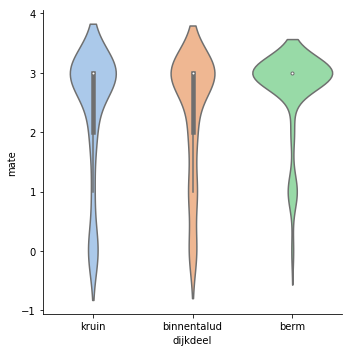

In [22]:
_ = sns.catplot(x='dijkdeel',y='mate', kind="violin", palette="pastel", data=df3)

Uit de bovenstaande plot blijkt dat er weinig verschil in distributie zit tussen de locatie van het dijkdeel en de gevonden mate van scheuren al is bij de berm te zien dat hier relatief beter gescoord wordt dan op de andere locaties.

We kijken ook nog even naar de relatie tussen de kwaliteit van het gras en de mate van scheuren.

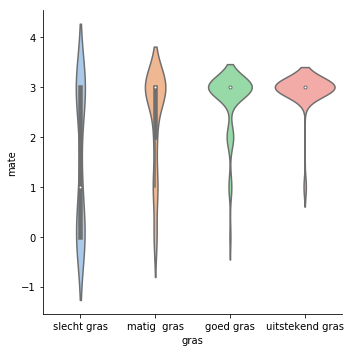

In [26]:
_ = sns.catplot(x='gras',y='mate', kind="violin", palette="pastel", data=df3, order=["slecht gras", 'matig  gras', 'goed gras', 'uitstekend gras'],)

Uit de bovenstaande plot kunnen we opmaken dat de kwaliteit van het gras een indicatie is van de mate van scheuren. Dit valt bijvoorbeeld te zien doordat bij slecht gras de distributie ook in de onderzijde zit. 

Bij uitstekend gras zien we de staart van de violin plot naar onderen ook afnemen wat inhoudt dat er minder slechte mate van scheuren gevonden zijn.

Er blijven echter voldoende plekken over waar er slecht gras is maar de mate van scheuren toch ok is dus het is een indicatie, niet meer dan dat.